# Import Packages

In [1]:
# Import Packages

import requests
import pandas as pd
from pandas import DataFrame
from pandas import concat
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import dash
import itertools
import statsmodels.api as sm
import re
import scikit_posthocs as sp
import seaborn as sns
from statsmodels.formula.api import ols
from matplotlib import pyplot
from sklearn.decomposition import PCA
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.ensemble import RandomForestRegressor
from itertools import product
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from dash import html
from dash import dcc
from scipy.stats import chi2
from scipy.stats import kruskal
from statsmodels.graphics.factorplots import interaction_plot
from scipy.stats import shapiro
from scipy.stats import levene

# Download Delay Data

In [2]:
#Wait Assessment 2020 Onwards - "https://data.ny.gov/resource/swky-c3v4.csv"

# Create a directory to store the csv files
os.makedirs("data", exist_ok=True)

# Download the csv file
wait_assessment_2020 = "https://data.ny.gov/resource/swky-c3v4.csv?$limit=1000000000"
response = requests.get(wait_assessment_2020)

# Save the csv file to disk
csv_file = "wait_assessment_2020.csv"
with open(csv_file, "w") as f:
    f.write(response.text)

#Save the csv file to a dataframe    
wait_assessment_2020 = pd.read_csv(csv_file)

In [ ]:
# Column and row count
print(wait_assessment_2020.shape)

# Describe the dataframe
wait_assessment_2020.describe(include="all")

In [ ]:
# Column name and data type
print(wait_assessment_2020.dtypes)

In [3]:
# Split the month and year into separate columns
wait_assessment_2020[["Year", "Month"]] = wait_assessment_2020["month"].str.split("-", expand=True)

In [ ]:
# Describe the dataframe
wait_assessment_2020.describe(include="all")

In [4]:
# Wait Assessment 2015 - 2019 - "https://data.ny.gov/resource/bmix-dpzc.csv"

# Download the csv file
wait_assessment_2015 = "https://data.ny.gov/resource/bmix-dpzc.csv?$limit=1000000000"
response = requests.get(wait_assessment_2015)

# Save the csv file to disk
csv_file = "wait_assessment_2015.csv"
with open(csv_file, "w") as f:
    f.write(response.text)

#Save the csv file to a dataframe    
wait_assessment_2015 = pd.read_csv(csv_file)

In [ ]:
# Print the shape of the dataframe
print(wait_assessment_2015.shape)

# Describe the dataframe
wait_assessment_2015.describe(include="all")

In [5]:
# Split the month and year into separate columns
wait_assessment_2015[["Year", "Month"]] = wait_assessment_2015["month"].str.split("-", expand=True)

In [6]:
# Merge the two dataframes
wait_assessment_2015_2020 = pd.concat([wait_assessment_2020, wait_assessment_2015], axis=0, ignore_index=True)

In [ ]:
# Print the shape of the dataframe
print(wait_assessment_2015_2020.shape)

# Describe the dataframe
wait_assessment_2015_2020.describe(include="all")


In [ ]:
# Service Deliviered 2020 Onwards - "https://data.ny.gov/resource/2e6s-9gpm.csv"

# Download the csv file
service_delivered_2020 = "https://data.ny.gov/resource/2e6s-9gpm.csv?$limit=1000000000"
response = requests.get(service_delivered_2020)

# Save the csv file to disk
csv_file = "service_delivered_2020.csv"
with open(csv_file, "w") as f:
    f.write(response.text)

#Save the csv file to a dataframe    
service_delivered_2020 = pd.read_csv(csv_file)

In [ ]:
# Service Deliviered 2015 - 2019 - "https://data.ny.gov/resource/tw28-zvtk.csv"

# Download the csv file
service_delivered_2015 = "https://data.ny.gov/resource/tw28-zvtk.csv?$limit=1000000000"
response = requests.get(service_delivered_2015)

# Save the csv file to disk
csv_file = "service_delivered_2015.csv"
with open(csv_file, "w") as f:
    f.write(response.text)

#Save the csv file to a dataframe    
service_delivered_2015 = pd.read_csv(csv_file)

# Download Traffic Data

This is a large file and takes some time to download.  It is not included in the repository. but the transformed data is.

In [ ]:
# Hourly Traffic on (MTA) Bridges and Tunnels: Beginning 2010 - "https://data.ny.gov/resource/qzve-kjga.csv"

# Download the csv file
hourly_traffic = "https://data.ny.gov/resource/qzve-kjga.csv?$limit=1000000000"
response = requests.get(hourly_traffic)

# Save the csv file to disk
csv_file = "hourly_traffic.csv"
with open(csv_file, "w") as f:
    f.write(response.text)

#Save the csv file to a dataframe    
hourly_traffic = pd.read_csv(csv_file)


In [7]:
# Loading the csv file for hourly_traffic
hourly_traffic = pd.read_csv('hourly_traffic.csv')

In [ ]:
# Print the shape of the dataframe
print(hourly_traffic.shape)

# Describe the dataframe
hourly_traffic.describe(include="all")

In [8]:
# Create a new column named total_vehicles by adding the vehicles_e_zpass and vehicles_vtoll columns
hourly_traffic["total_vehicles"] = hourly_traffic["vehicles_e_zpass"] + hourly_traffic["vehicles_vtoll"]

In [9]:
# Extract the year from the date_time column
hourly_traffic["year"] = hourly_traffic["date"].str[:4]

# Extract the month from the date column
hourly_traffic["month"] = hourly_traffic["date"].str[5:7]

In [10]:
# Transform the dataframe to group by the Year, Month, plaza_id, and direction columns, giving the sum of the total_vehicles, vehicles_e_zpass, and vehicles_vtoll columns
hourly_traffic_transformed = hourly_traffic.groupby(["year", "month", "plaza_id", "direction"]).agg({"total_vehicles": "sum", "vehicles_e_zpass": "sum", "vehicles_vtoll": "sum"}).reset_index()    

In [ ]:
# Print the shape of the dataframe
print(hourly_traffic_transformed.shape)

# Describe the dataframe
hourly_traffic_transformed.describe(include="all")


In [ ]:
# Add a column named 'value_type', all the values in this column should say 'vehicle_count'
hourly_traffic_transformed = hourly_traffic_transformed.assign(value_type="vehicle_count")

# change the plaza_id column to location_id, and change total_vehicles to value
hourly_traffic_transformed = hourly_traffic_transformed.rename(columns={"plaza_id": "location_id", "total_vehicles": "value"})

In [ ]:
# Keep columns 1-5 and column 8 and drop the rest
hourly_traffic_transformed = hourly_traffic_transformed.iloc[:, list(range(5)) + [7]]

# swap the order of the last 2 columns
hourly_traffic_transformed = hourly_traffic_transformed.iloc[:, [0, 1, 2, 3, 5, 4]]

In [ ]:
# Add a column named 'data_source', all the values in this column should say 'hourly_traffic'
hourly_traffic_transformed = hourly_traffic_transformed.assign(data_source="hourly_traffic")

In [ ]:
# Save the dataframe to a csv file
hourly_traffic_transformed.to_csv("hourly_traffic_transformed.csv", index=False)

In [11]:
# Load the csv file for hourly_traffic_transformed
hourly_traffic_transformed = pd.read_csv("hourly_traffic_transformed.csv")

hourly_traffic_transformed is one traffic df
columns are:
year
month
location_id
direction
value_type
value

The following csv is a large file available at https://data.cityofnewyork.us/resource/7ym2-wayt
The full file has been downloaded and is used in the following script.
The aggregate output will also be made available and it is recommended this is the version to work with

In [ ]:
# Open a CSV file and write it to a df using pandas
# Open the CSV file

traffic_speeds = pd.read_csv('DOT_Traffic_Speeds_NBE_20240121.csv')

In [ ]:
ts_backup = traffic_speeds

In [ ]:
# Print the shape of the dataframe
print(traffic_speeds.shape)

# Describe the dataframe
traffic_speeds.describe(include="all")

In [ ]:
# Keep the Speed, travel_time, status, data_as_of, link_id, and borough columns
traffic_speeds = traffic_speeds[['SPEED', 'TRAVEL_TIME', 'STATUS', 'DATA_AS_OF', 'LINK_ID', 'BOROUGH']]

In [ ]:
# Extract the year from the data_as_of column which is in the format of 09/20/2019 07:27:03 AM
traffic_speeds["year"] = traffic_speeds["DATA_AS_OF"].str[6:10]

# Extract the month from the data_as_of column which is in the format of 09/20/2019 07:27:03 AM
traffic_speeds["month"] = traffic_speeds["DATA_AS_OF"].str[0:2]

In [ ]:
# Group the dataframe by the Year, Month, and BOROUGH and LINK_ID, columns, giving the mean of the speed and travel_time columns
traffic_speeds_transformed = traffic_speeds.groupby(["year", "month", "BOROUGH", "LINK_ID"]).agg({"SPEED": "mean", "TRAVEL_TIME": "mean"}).reset_index()

In [ ]:
# Print the shape of the dataframe
print(traffic_speeds_transformed.shape)

# Describe the dataframe
traffic_speeds_transformed.describe(include="all")

In [ ]:
# save the dataframe to a csv file
traffic_speeds_transformed.to_csv("traffic_speeds_transformed.csv", index=False)

In [12]:
# load the transformed dataframe from a csv file
traffic_speeds_transformed = pd.read_csv("traffic_speeds_transformed.csv")

In [ ]:
# Melt the dataframe so that the values in the speed and travel_time columns are in the same column and the column names are in a column named 'value_type'
traffic_speeds_transformed = traffic_speeds_transformed.melt(id_vars=["year", "month", "BOROUGH", "LINK_ID"], value_vars=["SPEED", "TRAVEL_TIME"], var_name="value_type", value_name="value")

In [ ]:
# Lowercase the value_type column
traffic_speeds_transformed["value_type"] = traffic_speeds_transformed["value_type"].str.lower()

In [ ]:
# Remove the BOROUGH column and change the LINK_ID column to location_id
traffic_speeds_transformed = traffic_speeds_transformed.drop(columns=["BOROUGH"])
traffic_speeds_transformed = traffic_speeds_transformed.rename(columns={"LINK_ID": "location_id"})

In [ ]:
# Add a column named 'direction' with all the values in this column should be null
traffic_speeds_transformed = traffic_speeds_transformed.assign(direction="null")

In [ ]:
# Move the direction column to behind the location_id column
traffic_speeds_transformed = traffic_speeds_transformed.iloc[:, [0, 1, 2, 5, 3, 4]]

In [ ]:
# add a column named 'data_source' with all the values in this column should be 'traffic_speeds'
traffic_speeds_transformed = traffic_speeds_transformed.assign(data_source="traffic_speeds")

In [ ]:
# save the dataframe to a csv file
traffic_speeds_transformed.to_csv("traffic_speeds_transformed.csv", index=False)

In [13]:
# load the transformed dataframe from a csv file
traffic_speeds_transformed = pd.read_csv("traffic_speeds_transformed.csv")

traffic_speeds_transformed is one traffic df

Skip download and use the transformed data instead.

In [ ]:
# https://data.cityofnewyork.us/Transportation/Automated-Traffic-Volume-Counts/7ym2-wayt

# Download the csv file
# Use a select and group by statement to get the count of the volume column grouped by the year, month, and roadway_name columns

automated_traffic_volume_counts = "https://data.ny.gov/resource/7ym2-wayt.csv?$select=Yr,M,Boro,sum(Vol)&$group=Yr,M,Boro&$limit=1000000000" 
response = requests.get(automated_traffic_volume_counts)

In [ ]:
# Save the csv file to disk
csv_file = "automated_traffic_volume_counts.csv"
with open(csv_file, "w") as f:
    f.write(response.text)

In [14]:
# Load the csv file to a dataframe
automated_traffic_volume_counts = pd.read_csv("automated_traffic_volume_counts.csv")


In [ ]:
automated_traffic_volume_counts.describe(include='all')

In [ ]:
# Change the column names to year, month, location_id, and value
automated_traffic_volume_counts = automated_traffic_volume_counts.rename(columns={"Yr": "year", "M": "month", "Boro": "location_id", "sum_Vol": "value"})

# Add a column named 'value_type' with all the values in this column should say 'vehicle_count'
automated_traffic_volume_counts = automated_traffic_volume_counts.assign(value_type="vehicle_count")

# Add a column named 'direction' with all the values in this column should be null
automated_traffic_volume_counts = automated_traffic_volume_counts.assign(direction="null")

In [ ]:
# Set the order of the columns to 0,1,2,5,4,3
automated_traffic_volume_counts = automated_traffic_volume_counts.iloc[:, [0, 1, 2, 5, 4, 3]]

In [ ]:
# Add a column named 'data_source' with all the values in this column should be 'automated_traffic_volume_counts'
automated_traffic_volume_counts = automated_traffic_volume_counts.assign(data_source="automated_traffic_volume_counts")

In [ ]:
# save the dataframe to a csv file
automated_traffic_volume_counts.to_csv("automated_traffic_volume_counts_transformed.csv", index=False)

In [15]:
automated_traffic_volume_counts_transformed = pd.read_csv("automated_traffic_volume_counts_transformed.csv")

automated_traffic_volume_counts_transformed is one traffic df

In [ ]:
# Daily Traffic - "https://data.ny.gov/resource/cwhc-n4ek.csv"

# Download the csv file
daily_traffic = "https://data.ny.gov/resource/cwhc-n4ek.csv?$limit=1000000000"
response = requests.get(daily_traffic)

# Save the csv file to disk
csv_file = "daily_traffic.csv"
with open(csv_file, "w") as f:
    f.write(response.text)

#Save the csv file to a dataframe    
daily_traffic = pd.read_csv(csv_file)

In [16]:
# Load the csv file
daily_traffic = pd.read_csv('daily_traffic.csv')

In [ ]:
# Print the shape of the dataframe
print(daily_traffic.shape)

# Describe the dataframe
daily_traffic.describe(include="all")

In [ ]:
# Extract the year from the date column
daily_traffic["year"] = daily_traffic["date"].str[:4]

# Extract the month from the date column
daily_traffic["month"] = daily_traffic["date"].str[5:7]

In [ ]:
# Add the vehicles_e_zpass and vehicles_vtoll columns to get the total_vehicles column
daily_traffic["value"] = daily_traffic["vehicles_e_zpass"] + daily_traffic["vehicles_vtoll"]

In [ ]:
# Get the sum of the total_vehicles, vehicles_e_zpass, and vehicles_vtoll columns grouped by the Year, Month, plaza_id, and direction columns
daily_traffic_transformed = daily_traffic.groupby(["year", "month", "plaza_id", "direction"]).agg({"value": "sum", "vehicles_e_zpass": "sum", "vehicles_vtoll": "sum"}).reset_index()

In [ ]:
# Write the dataframe to a csv file
daily_traffic_transformed.to_csv("daily_traffic_transformed.csv", index=False)

In [17]:
# Load the csv file
daily_traffic_transformed = pd.read_csv('daily_traffic_transformed.csv')

In [ ]:
# Print the shape of the dataframe
print(daily_traffic_transformed.shape)

# Describe the dataframe
daily_traffic_transformed.describe(include="all")

In [ ]:
# add a column named 'value_type' with all the values in this column should say 'vehicle_count'
daily_traffic_transformed = daily_traffic_transformed.assign(value_type="vehicle_count")

# change the plaza_id column to location_id
daily_traffic_transformed = daily_traffic_transformed.rename(columns={"plaza_id": "location_id"})


In [ ]:
# swap the order of the last 2 columns
daily_traffic_transformed = daily_traffic_transformed.iloc[:, [0, 1, 2, 3, 7, 4]]

In [ ]:
# add a column named 'data_source' with all the values in this column should be 'daily_traffic'
daily_traffic_transformed = daily_traffic_transformed.assign(data_source="daily_traffic")

In [ ]:
# save the dataframe to a csv file
daily_traffic_transformed.to_csv("daily_traffic_transformed.csv", index=False)

In [18]:
# load the transformed dataframe from a csv file
daily_traffic_transformed = pd.read_csv("daily_traffic_transformed.csv")


daily_traffic_transformed is one traffic df

In [ ]:
# Traffic Volume Count Smaller - "https://data.cityofnewyork.us/resource/btm5-ppia.csv"

# Download the csv file
volume_count_small = "https://data.cityofnewyork.us/resource/btm5-ppia.csv?$limit=1000000000"
response = requests.get(volume_count_small)

# Save the csv file to disk
csv_file = "volume_count_small.csv"
with open(csv_file, "w") as f:
    f.write(response.text)

#Save the csv file to a dataframe    
volume_count_small = pd.read_csv(csv_file)

In [ ]:
# Print the shape of the dataframe
print(volume_count_small.shape)

# Describe the dataframe
volume_count_small.describe(include="all")

In [ ]:
# Create a new column named all day which is the sum of all columns ending in am or pm
volume_count_small["value"] = volume_count_small.filter(regex="am|pm").sum(axis=1)

In [ ]:
# Create a Year column by extracting the year from the date column
volume_count_small["year"] = volume_count_small["date"].str[0:4]

# Create a Month column by extracting the month from the date column
volume_count_small["month"] = volume_count_small["date"].str[5:7]

In [ ]:
# Create a new dataframe by grouping the volume_count_small dataframe by the Year, Month, roadway_name, direction columns, giving the sum of the all_day column
volume_count_small_transformed = volume_count_small.groupby(["year", "month", "roadway_name", "direction"]).agg({"value": "sum"}).reset_index()

In [ ]:
# Change the column names to year, month, location_id, and value
volume_count_small_transformed = volume_count_small_transformed.rename(columns={"roadway_name": "location_id"})

# Add a column named 'value_type' with all the values in this column should say 'vehicle_count'
volume_count_small_transformed = volume_count_small_transformed.assign(value_type="vehicle_count")


In [ ]:
# Swap the order of the last 2 columns
volume_count_small_transformed = volume_count_small_transformed.iloc[:, [0, 1, 2, 3, 5, 4]]

In [ ]:
# Print the shape of the dataframe
print(volume_count_small_transformed.shape)

# Describe the dataframe
volume_count_small_transformed.describe(include="all")

In [ ]:
# Add a column named 'data_source' with all the values in this column should be 'volume_count_small'
volume_count_small_transformed = volume_count_small_transformed.assign(data_source="volume_count_small")

In [ ]:
# Save the dataframe to a csv file
volume_count_small_transformed.to_csv("volume_count_small_transformed.csv", index=False)

In [19]:
# Load the csv file
volume_count_small_transformed = pd.read_csv('volume_count_small_transformed.csv')

volume_count_small_transformed is one traffic df

In [20]:
# Merge all the dataframes into one dataframe
traffic = pd.concat([hourly_traffic_transformed, traffic_speeds_transformed, automated_traffic_volume_counts_transformed, daily_traffic_transformed, volume_count_small_transformed], axis=0, ignore_index=True)

In [ ]:
# Print the shape of the dataframe
print(traffic.shape)

# Describe the dataframe
traffic.describe(include="all")

In [21]:
# Set the year and month columns to integers
traffic["year"] = traffic["year"].astype(int)
traffic["month"] = traffic["month"].astype(int)

In [ ]:
# Find the minimum and maximum year
print(traffic["year"].min())
print(traffic["year"].max())


# Upload Weather Data

Weather data uploaded from local file

Weather data is available from https://scacis.rcc-acis.org/

Copied to csv and then loaded locally

In [ ]:
# Load in all the csv files
weather_avg_perc = pd.read_csv('NYC Weather - average_percipitation.csv')
weather_avg_temp = pd.read_csv('NYC Weather - avg_temp.csv')
weather_max_perc = pd.read_csv('NYC Weather - max_precipitation.csv')
weather_max_snow_depth = pd.read_csv('NYC Weather - max_snow_depth.csv')
weather_max_snowfall = pd.read_csv('NYC Weather - max_snowfall.csv')
weather_max_temp = pd.read_csv('NYC Weather - Max_Temp.csv')
weather_min_temp = pd.read_csv('NYC Weather - Min_Temp.csv')
weather_total_perc = pd.read_csv('NYC Weather - total_percipitation.csv')
weather_total_snow_depth = pd.read_csv('NYC Weather - total_snow_depth.csv')
weather_total_snowfall = pd.read_csv('NYC Weather - total_snowfall.csv')

In [ ]:
# Combine all the weather dataframes into one dataframe with a column named weather_type to indicate the type of weather
weather_avg_perc["weather_type"] = "average_percipitation"
weather_avg_temp["weather_type"] = "avg_temp"
weather_max_perc["weather_type"] = "max_precipitation"
weather_max_snow_depth["weather_type"] = "max_snow_depth"
weather_max_snowfall["weather_type"] = "max_snowfall"
weather_max_temp["weather_type"] = "max_temp"   
weather_min_temp["weather_type"] = "min_temp"
weather_total_perc["weather_type"] = "total_percipitation"
weather_total_snow_depth["weather_type"] = "total_snow_depth"
weather_total_snowfall["weather_type"] = "total_snowfall"

# Combine all the weather dataframes into one dataframe
weather = pd.concat([weather_avg_perc, weather_avg_temp, weather_max_perc, weather_max_snow_depth, weather_max_snowfall, weather_max_temp, weather_min_temp, weather_total_perc, weather_total_snow_depth, weather_total_snowfall], axis=0, ignore_index=True)


In [ ]:
weather.describe(include='all')

In [ ]:
# Take everything from 2000 onwards
weather2000 = weather[weather['Year'] >= 2000]

In [ ]:
weather2000.describe(include='all')

In [ ]:
# Remove the Annual column  
weather2000 = weather2000.drop(columns=['Annual'])

In [ ]:
# Melt the dataframe so it is in long format
weather2001 = weather2000.melt(id_vars=["Year", "weather_type"], var_name="month", value_name="value")

In [ ]:
weather2001.describe(include='all')

In [ ]:
# Rename the Year column to year
weather2001 = weather2001.rename(columns={"Year": "year"})

In [ ]:
# Change the month column from Jan to 01, Feb to 02, etc.
weather2001["month"] = weather2001["month"].str.replace("Jan", "01")
weather2001["month"] = weather2001["month"].str.replace("Feb", "02")
weather2001["month"] = weather2001["month"].str.replace("Mar", "03")
weather2001["month"] = weather2001["month"].str.replace("Apr", "04")
weather2001["month"] = weather2001["month"].str.replace("May", "05")
weather2001["month"] = weather2001["month"].str.replace("Jun", "06")
weather2001["month"] = weather2001["month"].str.replace("Jul", "07")
weather2001["month"] = weather2001["month"].str.replace("Aug", "08")
weather2001["month"] = weather2001["month"].str.replace("Sep", "09")
weather2001["month"] = weather2001["month"].str.replace("Oct", "10")
weather2001["month"] = weather2001["month"].str.replace("Nov", "11")
weather2001["month"] = weather2001["month"].str.replace("Dec", "12")

In [ ]:
# Swap the order of the last 2 columns
weather = weather2001.iloc[:, [0, 2, 1, 3]]

In [ ]:
# save the dataframe to a csv file
weather.to_csv("weather.csv", index=False)

In [22]:
# load the transformed dataframe from a csv file
weather = pd.read_csv("weather.csv")

In [ ]:
# Pick a random sample of 50 rows
weather2002 = weather.sample(n=50, random_state=1) 

weather2002.describe(include='all')

print(weather2002)

End of weather data upload

In [ ]:
# Bus Delay Time Years are from 2015 - 2024
# The Earliest Weather Data is from 2000 - 2024
# The Earliest Traffic Data is from 2000 - 2024

# Perform EDA

Perform EDA on the delay data

In [23]:
# Change the month column to date and the Year column to year
delays = wait_assessment_2015_2020.rename(columns={"month": "date", "Year": "year", "Month": "month"})

In [ ]:
# Perform EDA on the wait_assessment_2015_2020 dataframe
delays.describe(include='all')

In [ ]:
# Check the correlation between the columns
delays.corr()

# Print a correlation heatmap
sns.heatmap(delays.corr())

In [ ]:
# Create histograms for the columns
delays.hist()

In [ ]:
# Take the wait Assemsent column and plot a histogram
sns.histplot(delays['wait_assessment'], kde=True).set(title='Wait Assessment Distribution', xlabel='Wait Assessment', ylabel='Frequency')

In [ ]:
# Take the wait Assemsent column and plot a boxplot
sns.boxplot(x=delays["wait_assessment"]).set(title='Wait Assessment Boxplot', xlabel='Wait Assessment')

In [ ]:
# Test if the wait_assessment column is normally distributed
stat, p = shapiro(delays['wait_assessment'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

In [ ]:
# Print the percentiles of the wait_assessment column
print(delays["wait_assessment"].quantile([0.25, 0.5, 0.75]))

In [ ]:
# Print the mean, median and mode of the wait_assessment column with explanations for their meaning
print(f"The mean of the wait_assessment column is {delays['wait_assessment'].mean()}. \
    The mean is the average of the wait_assessment column. \
    It is the sum of all the values in the wait_assessment column divided by the number of values in the wait_assessment column.")

print(f"The median of the wait_assessment column is {delays['wait_assessment'].median()}. \
      The median is the middle value of the wait_assessment column. \
      It is the value that splits the wait_assessment column into two halves.")


In [ ]:

# Print the skewness and kurtosis of the wait_assessment column with explanations for their meaning
print(f"The skewness of the wait_assessment column is {delays['wait_assessment'].skew()}. \
    A skewness of 0 means the wait_assessment column is normally distributed. \
    A skewness less than 0 means the wait_assessment column is left skewed. \
    A skewness greater than 0 means the wait_assessment column is right skewed.")

print(f"The kurtosis of the wait_assessment column is {delays['wait_assessment'].kurt()}. \
    The kurtosis is a measure of the tailedness of the wait_assessment column. \
    A kurtosis of 0 means the wait_assessment column has the same tailedness as a normal distribution. \
    A kurtosis less than 0 means the wait_assessment column is platykurtic. \
    A kurtosis greater than 0 means the wait_assessment column is leptokurtic.")



In [ ]:
# Create a time series plot for the wait assessment data where the route_id is BX1
delays[delays["route_id"] == 'BX1'].plot(x="date", y="wait_assessment")

In [24]:
# Create a df with the wait assessment data where the wait_assessment is an average of the wait_assessment column grouped by the year and month columns
delays2 = delays.groupby(["year", "month"]).agg({"wait_assessment": "mean"}).reset_index()

In [ ]:
# Display histogram of the wait_assessment column
delays2.hist()

In [ ]:
# Create a time series plot for the wait assessment data
delays2.plot(x="year", y="wait_assessment")

In [ ]:
# Group the dataframe by the date column, giving the mean of the wait_assessment column
timeeda = delays.groupby("date").agg({"wait_assessment": "mean"}).reset_index()

In [ ]:
# Convert the date column to a datetime object
timeeda["date"] = pd.to_datetime(timeeda["date"])

# Move the date column to the index
timeeda = timeeda.set_index("date")

In [ ]:
# Plot the Time Series
plt.figure(figsize=(15, 7))
plt.plot(timeeda.index, timeeda["wait_assessment"], color="blue")
plt.title("Wait Assessment Over Time")
plt.xlabel("Date")
plt.ylabel("Wait Assessment")
plt.xticks(rotation=45)
plt.show()

In [ ]:
timeeda.index

Perform EDA on the traffic data

In [ ]:
# Perform EDA on the traffic dataframe
traffic.describe(include='all')

In [ ]:
# Check the correlation between the columns
traffic.corr()

# Print a correlation heatmap

sns.heatmap(traffic.corr())

In [ ]:
# Create histograms for the columns
traffic.hist()

In [ ]:
# Create a time series plot for the traffic data
traffic.plot(x="year", y="value")

In [ ]:
# Print the value counts for the value_type column
traffic["value_type"].value_counts()

In [ ]:
# Take only the rows where the value_type is vehicle_count
traffic2 = traffic[traffic["value_type"] == "vehicle_count"]

In [ ]:
traffic_speed = traffic[traffic["value_type"] == "speed"]

In [ ]:
traffic_time = traffic[traffic["value_type"] == "travel_time"]

In [ ]:
# Describe the dataframe
traffic_speed.describe(include="all")

In [ ]:
# Find the minimum and maximum year
print(traffic_speed["year"].min())
print(traffic_speed["year"].max())

print(traffic_time["year"].min())
print(traffic_time["year"].max())

print(traffic2["year"].min())
print(traffic2["year"].max())

In [ ]:
print(traffic2["year"].min())
print(traffic2["year"].max())

In [ ]:
# Describe the dataframe
traffic2.describe(include="all")

In [ ]:
# Create a seperate dataframe for the traffic data where the location_id is 3
traffic3 = traffic2[traffic2["location_id"] == 3]

In [ ]:
# Describe the dataframe
traffic3.describe(include="all")

In [ ]:
# Take value counts of the data_source column
traffic3["data_source"].value_counts()

In [ ]:
# Create seperate dataframes for the traffic data where the data_source is hourly_traffic and daily_traffic
traffic_hourly = traffic3[traffic3["data_source"] == "hourly_traffic"]

In [ ]:
# Get the sum of the value column grouped by the year and month columns
traffic3 = traffic3.groupby(["year", "month"]).agg({"value": "sum"}).reset_index()

In [ ]:
# Create a date column by combining the year and month columns
traffic3["date"] = traffic3["year"].astype(str) + "-" + traffic3["month"].astype(str)

# Convert the date column to a date data type
traffic3["date"] = pd.to_datetime(traffic3["date"])

In [ ]:
# Create a time series plot for the traffic data with year and month on the x-axis and value on the y-axis
traffic3.plot(x="date", y="value")

Perform EDA on the weather data

In [ ]:
# Perform EDA on the weather dataframe
weather.describe(include='all')


# Check the correlation between the columns
weather.corr()

# Print a correlation heatmap
sns.heatmap(weather.corr())

In [25]:
# Replace any alpha characters with null in the value column
weather["value"] = pd.to_numeric(weather["value"], errors="coerce")

In [ ]:
# Show the number of null values in the value column grouped by the weather_type column
weather.groupby("weather_type").agg({"value": "count"})

In [26]:
# Create a date column by combining the year and month columns
weather["date"] = weather["year"].astype(str) + "-" + weather["month"].astype(str)

# Convert the date column to a date data type
weather["date"] = pd.to_datetime(weather["date"])

In [ ]:
# Create a time series plot for the weather data with year and month on the x-axis and value on the y-axis where the weather_type is the title
weather[weather["weather_type"] == "max_temp"].plot(x="date", y="value", title="max_temp")
weather[weather["weather_type"] == "min_temp"].plot(x="date", y="value", title="min_temp")
weather[weather["weather_type"] == "avg_temp"].plot(x="date", y="value", title="avg_temp")
weather[weather["weather_type"] == "max_precipitation"].plot(x="date", y="value", title="max_precipitation")
weather[weather["weather_type"] == "average_percipitation"].plot(x="date", y="value", title="average_percipitation")
weather[weather["weather_type"] == "total_percipitation"].plot(x="date", y="value", title="total_percipitation")
weather[weather["weather_type"] == "max_snowfall"].plot(x="date", y="value", title="max_snowfall")
weather[weather["weather_type"] == "total_snowfall"].plot(x="date", y="value", title="total_snowfall")
weather[weather["weather_type"] == "max_snow_depth"].plot(x="date", y="value", title="max_snow_depth")
weather[weather["weather_type"] == "total_snow_depth"].plot(x="date", y="value", title="total_snow_depth")


In [27]:
# Fill in null values with interpolation
weather["value"] = weather.groupby("weather_type")["value"].transform(lambda x: x.interpolate())

# Check if there are any remaining null values
weather.isnull().sum()

year            0
month           0
weather_type    0
value           0
date            0
dtype: int64

In [ ]:
# Select the value counts for the weather_type column
weather["weather_type"].value_counts()

In [ ]:
# Find the date range for avg_temp and max_temp weather types
print(weather[weather["weather_type"] == "avg_temp"]["date"].min())
print(weather[weather["weather_type"] == "avg_temp"]["date"].max())

print(weather[weather["weather_type"] == "max_temp"]["date"].min())
print(weather[weather["weather_type"] == "max_temp"]["date"].max())


In [ ]:
# create an avg_temp dataframe and a max_temp dataframe
avg_temp = weather[weather["weather_type"] == "avg_temp"]
max_temp = weather[weather["weather_type"] == "max_temp"]

In [ ]:
# Convert the month column to a float data type
avg_temp["month"] = avg_temp["month"].astype(float)

# describe the avg_temp dataframe
avg_temp.describe(include="all")

In [ ]:
# Print the year and the month values, ordered by year and month
avg_temp.sort_values(["year", "month"])

In [28]:
# Remove any rows where the date is after 2023-12-01
weather = weather[weather["date"] <= "2023-12-01"]

In [ ]:
# Describe the weather dataframe
weather.describe(include="all")

In [ ]:
# Perform Value Counts on the weather_type column
weather["weather_type"].value_counts()

# Statistical Analysis

In [ ]:
delays.describe(include='all')

In [ ]:
# Remove the rows where period is Systemwide

delays_clean = delays[delays["period"] != "Systemwide"]

In [ ]:
# Remove the rows where borough is Systemwide or Misc
delays_clean = delays_clean[delays_clean["borough"] != "Systemwide"]
delays_clean = delays_clean[delays_clean["borough"] != "Misc"]

In [ ]:
delays_clean.describe(include='all')

In [ ]:
# Create an anova_delays df grouped by the date, bourough, route id, and period, with the mean of the wait_assessment column
anova_delays = delays_clean

Check Assumptions

In [ ]:
# Group Delays_clean by date, borough and period and get the mean of the wait_assessment column
delays_clean = delays_clean.groupby(["date", "borough", "period"]).agg({"wait_assessment": "mean"}).reset_index()

In [ ]:
# Print value counts for the period and borough columns
delays_clean["period"].value_counts()

In [ ]:
delays_clean.describe(include='all')

In [ ]:
anova_delays.describe(include='all')

In [ ]:
import numpy as np
from scipy.stats import levene

# Assuming your DataFrame is named df
# Drop rows with NaN values in 'wait_assessment' column
anova_delays_cleaned = anova_delays.dropna(subset=['wait_assessment'])

# Group the cleaned data
grouped_data = anova_delays_cleaned.groupby(['borough', 'period'])['wait_assessment']

# Convert the grouped data to a list of arrays
data = [group.values for name, group in grouped_data]

# Perform Levene's test
statistic, p_value = levene(*data)

# Check the result
if np.isnan(statistic) or np.isnan(p_value):
    print("Unable to perform Levene's test due to NaN values in the data.")
elif p_value > 0.05:
    print("Homogeneity of variances is satisfied (p > 0.05)")
else:
    print("Homogeneity of variances is not satisfied (p <= 0.05)")


In [ ]:
print(statistic, p_value)

In [ ]:
grouped_data = anova_delays.groupby(['borough', 'period'])['wait_assessment']

for name, group in grouped_data:
    # Perform Shapiro-Wilk test for normality
    stat, p_value = shapiro(group)
    
    # Check the result
    if p_value > 0.05:
        print(f"Data for {name} is normally distributed (p > 0.05)")
    else:
        print(f"Data for {name} is not normally distributed (p <= 0.05)")


In [ ]:
# Create a table showing the result of the Shapiro-Wilk test for normality for each group
shapiro_table = pd.DataFrame(columns=["group", "p_value"])

for name, group in grouped_data:
    stat, p_value = shapiro(group)
    shapiro_table = shapiro_table.append({"group": name, "p_value": p_value}, ignore_index=True)


In [ ]:
# export the shapiro_table to a csv file
shapiro_table.to_csv("shapiro_table.csv", index=False)

In [ ]:
# Create probability plots for the wait_assessment column grouped by the period and borough columns
for name, group in grouped_data:
    sm.qqplot(group, line ='45')
    plt.title(f"Probability Plot for {name}")
    plt.show()

Visualise the groupings

In [ ]:
# Generate a boxplot of the wait_assessment column grouped by the borough and period columns
sns.set_style("whitegrid")
sns.boxplot(x="borough", y="wait_assessment", hue="period", data=anova_delays, palette="Set1")
plt.xlabel('Borough')
plt.ylabel('Wait Assessment')
plt.title('Wait Assessment by Borough and Period')
plt.legend(title='Period', loc='lower right')
plt.show()

In [ ]:
# Print the mean and standard deviation for each borough and period combination
for x in anova_delays['borough'].unique():
    for y in anova_delays['period'].unique():
        print(x, y, "Mean :", round(anova_delays[(anova_delays['borough'] == x) & (anova_delays['period'] == y)]['wait_assessment'].mean(),2))
        print(x, y, "Standard Deviation :", round(anova_delays[(anova_delays['borough'] == x) & (anova_delays['period'] == y)]['wait_assessment'].std(),2),'\n')

In [ ]:
# Create a table with the mean and standard deviation for each borough and period combination and save it to a csv file
anova_delays.groupby(['borough', 'period'])['wait_assessment'].agg(['mean', 'std']).to_csv("delays_mean_stddev.csv")

In [ ]:
# Check the data types of the columns
print(anova_delays.dtypes)

In [ ]:
# Transform borough and period to categorical data types
anova_delays["borough"] = anova_delays["borough"].astype("category")
anova_delays["period"] = anova_delays["period"].astype("category")

Perform an ANOVA on the delay data

In [ ]:
# Perform two-way ANOVA
# The effect of borough, the effect of period, and the interaction between borough and period
model = ols('wait_assessment ~ borough + period + borough:period', data = anova_delays).fit()
aov2 = sm.stats.anova_lm(model, type=2)
print(aov2, '\n')

# print the results of the two-way ANOVA hypothesis tests
print(f"Borough p-value: {aov2['PR(>F)'][0]:.4f}")
print(f"Period p-value: {aov2['PR(>F)'][1]:.4f}")
print(f"Interaction p-value: {aov2['PR(>F)'][2]:.4f}", '\n')

# Print the results of the two-way ANOVA hypothesis tests
if aov2['PR(>F)'][0] < 0.05:
    print("Reject null hypothesis - Significant differences exist between Borough groups.")
else:
    print("Accept null hypothesis - No significant difference between Borough groups.")
    
if aov2['PR(>F)'][1] < 0.05:
    print("Reject null hypothesis - Significant differences exist between Period groups.")
else:
    print("Accept null hypothesis - No significant difference between Period groups.")
    
if aov2['PR(>F)'][2] < 0.05:
    print("Reject null hypothesis - Interaction occurs between factors.")
else:
    print("Accept null hypothesis - No interaction occurs between factors.") 

In [ ]:
# Store to aov2 in a table and save it to a csv file
aov2.to_csv("aov2.csv")

In [ ]:
# Convert 'period' and 'borough' columns to string type
anova_delays['period'] = anova_delays['period'].astype(str)
anova_delays['borough'] = anova_delays['borough'].astype(str)

# Plot the interaction plot
fig = interaction_plot(x=anova_delays['period'].values, trace=anova_delays['borough'].values, response=anova_delays['wait_assessment'].values)
plt.show()

Perform Post Hoc Tests

In [ ]:
# Perform a Tukey's Range Test to determine which groups are significantly different from each other
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's Range Test
tukey_results = pairwise_tukeyhsd(anova_delays['wait_assessment'], anova_delays['borough'], 0.05)

# Print the results
print(tukey_results)

In [ ]:
# Perform a Tukey's Range Test to determine which groups are significantly different from each other
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's Range Test
tukey_results = pairwise_tukeyhsd(anova_delays['wait_assessment'], anova_delays['period'], 0.05)

# Print the results
print(tukey_results)

Perform Kruskal-Wallus Test for Periods

In [ ]:
# Visualise the date distribution of the wait_assessment column
sns.set_style("whitegrid")
sns.boxplot(x="period", y="wait_assessment", data=delays_clean, palette="Set1")
plt.xlabel('Period')
plt.ylabel('Wait Assessment')
plt.title('Wait Assessment by Period')
plt.show()


In [ ]:
# Perform Kruskal-Wallis test
stat, p = kruskal(*[delays_clean[delays_clean['period'] == rate]['wait_assessment'] for rate in delays_clean['period'].unique()])

# Print the results
print("Kruskal-Wallis Test Results:")
print(f"Test statistic: {stat:.4f}")
print(f"P-value: {p:.4f}")

# Calculate the critical value for the significance level of 0.05
critical_value = chi2.ppf(1-0.05, 2)

print(f"Critical value: {critical_value:.4f}")

In [ ]:
# Perform post-hoc test
sp.posthoc_dunn([delays_clean[delays_clean['period'] == rate]['wait_assessment'] for rate in delays_clean['period'].unique()], p_adjust='holm')

Perform Kruska-Wallis Test for Boroughs

In [ ]:
# Visualise the date distribution of the wait_assessment column
sns.set_style("whitegrid")
sns.boxplot(x="borough", y="wait_assessment", data=delays_clean, palette="Set1")
plt.xlabel('Borough')
plt.ylabel('Wait Assessment')
plt.title('Wait Assessment by Borough')
plt.show()

In [ ]:
# Print the median value of the wait_assessment column grouped by the borough
print(delays_clean.groupby("borough")["wait_assessment"].median())

In [ ]:
# Perform Kruskal-Wallis test
stat, p = kruskal(*[delays_clean[delays_clean['borough'] == rate]['wait_assessment'] for rate in delays_clean['borough'].unique()])

# Print the results
print("Kruskal-Wallis Test Results:")
print(f"Test statistic: {stat:.4f}")
print(f"P-value: {p:.4f}")

# Calculate the critical value for the significance level of 0.05
critical_value = chi2.ppf(1-0.05, 2)

print(f"Critical value: {critical_value:.4f}")

In [ ]:
# Perform post-hoc test
sp.posthoc_dunn([delays_clean[delays_clean['borough'] == rate]['wait_assessment'] for rate in delays_clean['borough'].unique()], p_adjust='holm')

In [ ]:
# Save the post-hoc test results to a table and export it to a csv file
sp.posthoc_dunn([delays_clean[delays_clean['borough'] == rate]['wait_assessment'] for rate in delays_clean['borough'].unique()], p_adjust='holm').to_csv("posthoc_dunn.csv")

# Which Weather Data to Use

Get Weather Data in wide format

In [29]:
# Melt the weather dataframe so all the weather types are in seperate columns, with only the date column remaining
weather_wide = weather.pivot(index="date", columns="weather_type", values="value")

In [ ]:
# Describe the weather_wide dataframe
weather_wide.describe(include="all")

In [ ]:
# Describe the delays dataframe
delays2.describe(include="all")

In [30]:
# create a date column by combining the year and month columns
delays2["date"] = delays2["year"].astype(str) + "-" + delays2["month"].astype(str)

# Convert the date column to a date data type
delays2["date"] = pd.to_datetime(delays2["date"])

Join with Delay Data

In [31]:
delays_weather = pd.merge(weather_wide, delays2, on="date", how="left")

In [ ]:
# Describe the delays_weather dataframe
delays_weather.describe(include="all")

In [ ]:
# Find the Null values in the delays_weather dataframe
delays_weather.isnull().sum()

In [32]:
# Remove the Null values from the delays_weather dataframe
delays_weather = delays_weather.dropna()

Perform PCA to understand which weather data has the most impact on delays

In [ ]:
delays_weather.describe(include="all")

In [ ]:

# Separate the features (weather type columns) from the target (wait assessment column)
features = delays_weather.drop(columns=['date', 'wait_assessment', 'year', 'month'])
target = delays_weather['wait_assessment']

# Perform PCA
pca = PCA()
pca.fit(features)

# Get the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Create a dataframe to store the results
pca_results = pd.DataFrame({'Weather Type': features.columns, 'Explained Variance Ratio': explained_variance_ratio})

# Sort the dataframe by the explained variance ratio in descending order, round the values to 2 decimal places
pca_results = pca_results.round(2)
pca_results = pca_results.sort_values(by='Explained Variance Ratio', ascending=False)

# Print the results
print(pca_results)

# Print the Top 3 Weather Types
print(pca_results.iloc[0:3, 0])

In [33]:
# Keep only the avg_perc and avg_temp columns
weather_features = delays_weather[['date', 'average_percipitation', 'avg_temp']]

Use Average Percipitation and Average Temperature as the weather data

In [ ]:
weathereda = weather_features

In [ ]:
# Convert the date column to a datetime object
weathereda["date"] = pd.to_datetime(weathereda["date"])

# Move the date column to the index
weathereda = weathereda.set_index("date")

In [ ]:
# Plot a histogram of the average_percipitation column
sns.histplot(weather_features['average_percipitation'], kde=True).set(title='Average Percipitation Distribution', xlabel='Average Percipitation', ylabel='Frequency')

In [ ]:
# Create a boxplot with min max and median labels
#sns.boxplot(x=weather_features["average_percipitation"]).set(title='Average Percipitation Boxplot', xlabel='Average Percipitation')

import matplotlib.pyplot as plt

# Create the box plot
plt.boxplot(weather_features["average_percipitation"], labels=["Average Percipitation"])

# Add labels for min, max, and median values
min_val = weather_features["average_percipitation"].min()
max_val = weather_features["average_percipitation"].max()
median_val = weather_features["average_percipitation"].median()

plt.text(1, min_val, f"Min: {min_val:.2f}", ha='center', va='bottom')
plt.text(1, max_val, f"Max: {max_val:.2f}", ha='center', va='top')
plt.text(1, median_val, f"Median: {median_val:.2f}", ha='center', va='bottom')

# Set the title and x-axis label
plt.title('Average Percipitation Boxplot')
plt.xlabel('Average Percipitation')

# Display the plot
plt.show()


In [ ]:
# Print the mean and median of the average_percipitation column
print(f"The mean of the average_percipitation column is {weather_features['average_percipitation'].mean()}")

In [ ]:
# Print the 25th, 50th, 75th and 95th percentiles of the average_percipitation column
print(weather_features["average_percipitation"].quantile([0.25, 0.5, 0.75, 0.95]))

In [ ]:
print(f"The median of the average_percipitation column is {weather_features['average_percipitation'].median()}")

In [ ]:
# Print the skewness and kurtosis of the average_percipitation column
print(f"The skewness of the average_percipitation column is {weather_features['average_percipitation'].skew()}")

In [ ]:
# Plot a histogram of the avg_temp column
sns.histplot(weather_features['avg_temp'], kde=True).set(title='Average Temperature Distribution', xlabel='Average Temperature', ylabel='Frequency')

In [ ]:
# Calculate the mean and median of the average tempeture column
print(f"The mean of the avg_temp column is {weather_features['avg_temp'].mean()}")

In [ ]:
print(f"The median of the avg_temp column is {weather_features['avg_temp'].median()}")

In [ ]:
# Calculate the skewness and kurtosis of the average tempeture column
print(f"The skewness of the avg_temp column is {weather_features['avg_temp'].skew()}")
print(f"The kurtosis of the avg_temp column is {weather_features['avg_temp'].kurt()}")

In [ ]:
# Plot a time series plot for the average tempeture column
plt.figure(figsize=(15, 7))
plt.plot(weathereda.index, weathereda["avg_temp"], color="blue")
plt.title("Average Temperature Over Time")
plt.xlabel("Date")
plt.ylabel("Average Temperature")
plt.xticks(rotation=45)
plt.show()


# Which Traffic Data to Use

Get Traffic Data in wide format

In [ ]:
# Describe the traffic dataframe
traffic.describe(include="all")

In [34]:
traffic_wide = traffic

In [35]:
# Concatenate the 'value_type' and 'data_source' columns to create a new column named 'traffic_type'
traffic_wide["traffic_type"] = traffic_wide["value_type"] + "_" + traffic_wide["data_source"]

# Get rid of the 'value_type' and 'data_source' columns
traffic_wide = traffic_wide.drop(columns=["value_type", "data_source"])

In [ ]:
# Concate the 'location_id' and 'traffic_type' columns to create a new column named 'location_traffic_type'
#traffic_wide["location_traffic_type"] = traffic_wide["location_id"].astype(str) + "_" + traffic_wide["traffic_type"]

# Get rid of the 'location_id' column
#traffic_wide = traffic_wide.drop(columns=["location_id"])

In [36]:
# Create a date column by combining the year and month columns
traffic_wide["date"] = traffic_wide["year"].astype(str) + "-" + traffic_wide["month"].astype(str)

# Convert the date column to a date data type
traffic_wide["date"] = pd.to_datetime(traffic_wide["date"])

# Drop the year and month columns
traffic_wide = traffic_wide.drop(columns=["year", "month"])

In [ ]:
# Describe the traffic_wide dataframe
traffic_wide.describe(include="all")

In [37]:
# Transform the traffic_wide dataframe so that the values for where the location_id and traffic_type columns are added together
traffic_wide = traffic_wide.groupby(["date", "location_id", "traffic_type"]).agg({"value": "sum"}).reset_index()

In [38]:
# Transform the traffic_wide dataframe so that the values for where the location_id and traffic_type are the same are averaged together
traffic_wide = traffic_wide.groupby(["date", "traffic_type"]).agg({"value": "mean"}).reset_index()

In [39]:
# Melt the traffic_wide dataframe so all the traffic_type column values are in seperate columns, with only the date column remaining
traffic_wide = traffic_wide.pivot(index="date", columns="traffic_type", values="value")

In [ ]:
# Describe the traffic_wide dataframe
traffic_wide.describe(include="all")

Join with Delay Data

In [40]:
# Join the traffic_wide and delays dataframes together
traffic_delays = pd.merge(traffic_wide, delays2, on="date", how="left")

In [ ]:
# Describe the traffic_delays dataframe
traffic_delays.describe(include="all")

In [ ]:
# Check for Null values in the traffic_delays dataframe
traffic_delays.isnull().sum()

In [41]:
# Take only the rows where the wait_assessment column is not null
traffic_delays = traffic_delays[traffic_delays["wait_assessment"].notnull()]

In [ ]:
# Plot a time series graph of the traffic columns in the traffic_delays dataframe
traffic_delays.plot(x="date", y=["speed_traffic_speeds", "travel_time_traffic_speeds","vehicle_count_automated_traffic_volume_counts","vehicle_count_daily_traffic", "vehicle_count_hourly_traffic"])

In [42]:
# Use interpolation to fill in the Null values in the traffic_delays dataframe
traffic_delays = traffic_delays.interpolate(method='pad')

In [43]:
# Remove the vehicle_count_volume_count_small column and all rows after 2023-12-01
traffic_delays = traffic_delays.drop(columns=["vehicle_count_volume_count_small", "travel_time_traffic_speeds", "speed_traffic_speeds", "vehicle_count_daily_traffic"])
traffic_delays = traffic_delays[traffic_delays["date"] <= "2023-12-01"]

In [ ]:
traffic_delays.describe(include="all")

In [ ]:
# Count the number of Null values in the traffic_delays dataframe
traffic_delays.isnull().sum()

Perform PCA to understand which traffic data has the most impact on delays

In [ ]:
# Separate the features (traffic type columns) from the target (wait assessment column)
features = traffic_delays.drop(columns=['date', 'wait_assessment', 'year', 'month'])
target = traffic_delays['wait_assessment']

# Perform PCA
pca = PCA()
pca.fit(features)

# Get the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Create a dataframe to store the results
pca_results = pd.DataFrame({'Traffic Type': features.columns, 'Explained Variance Ratio': explained_variance_ratio})

# Sort the dataframe by the explained variance ratio in descending order, round the values to 2 decimal places
pca_results = pca_results.round(2)
pca_results = pca_results.sort_values(by='Explained Variance Ratio', ascending=False)

# Print the results
print(pca_results)

# Print the Top 2 Traffic Types
print(pca_results.iloc[0:2, 0])

In [44]:
# Keep only the avg_perc and avg_temp columns
traffic_features = traffic_delays[['date', 'vehicle_count_automated_traffic_volume_counts']]

In [ ]:
trafficeda = traffic_features

In [ ]:
# Convert the date column to a datetime object
trafficeda["date"] = pd.to_datetime(trafficeda["date"])

# Move the date column to the index
trafficeda = trafficeda.set_index("date")

In [ ]:
# Plot the normal distribution of the vehicle_count_automated_traffic_volume_counts column
sns.set_style("whitegrid")
sns.histplot(trafficeda['vehicle_count_automated_traffic_volume_counts'], kde=True).set(title='Vehicle Count Automated Traffic Volume Counts Distribution', xlabel='Vehicle Count Automated Traffic Volume Counts', ylabel='Frequency')

In [ ]:
# Print the mean and median values of the vehicle_count_automated_traffic_volume_counts column
print(f"The mean of the vehicle_count_automated_traffic_volume_counts column is {trafficeda['vehicle_count_automated_traffic_volume_counts'].mean()}")

In [ ]:
print(f"The median of the vehicle_count_automated_traffic_volume_counts column is {trafficeda['vehicle_count_automated_traffic_volume_counts'].median()}")

In [ ]:
# Check the skewness and kurtosis of the vehicle_count_automated_traffic_volume_counts column
print(f"The skewness of the vehicle_count_automated_traffic_volume_counts column is {trafficeda['vehicle_count_automated_traffic_volume_counts'].skew()}")

In [ ]:
print(f"The kurtosis of the vehicle_count_automated_traffic_volume_counts column is {trafficeda['vehicle_count_automated_traffic_volume_counts'].kurt()}")

In [ ]:
# Check the normality of the vehicle_count_automated_traffic_volume_counts column
stat, p = shapiro(trafficeda['vehicle_count_automated_traffic_volume_counts'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

In [ ]:
# Create a time series plot for the vehicle_count_automated_traffic_volume_counts data
plt.figure(figsize=(15, 7))
plt.plot(trafficeda.index, trafficeda["vehicle_count_automated_traffic_volume_counts"], color="red")
plt.title("Vehicle Count Automated Traffic Volume Counts Over Time")
plt.xlabel("Date")
plt.ylabel("Vehicle Count Automated Traffic Volume Counts")
plt.xticks(rotation=45)
plt.show()

Use vehicle_count_automated_traffic_volume_counts as the traffic data

# Perform a Time Series Analysis

Create the data for the model, combining the delays, weather and traffic data

In [45]:
# Drop the year and month columns
delays2 = delays2.drop(columns=["year", "month"])

In [ ]:
delays2.describe(include="all")

In [ ]:
weather_features.describe(include="all")

In [ ]:
traffic_features.describe(include="all")

In [46]:
# Join the weather_features and traffic_features and delays2 dataframes together
features = pd.merge(delays2, weather_features, on="date", how="left")
features = pd.merge(features, traffic_features, on="date", how="left")

In [ ]:
# Describe the features dataframe
features.describe(include="all")

Decompose the time series to understand the trend and seasonality

In [47]:
# Convert the date column to a date data type
features["date"] = pd.to_datetime(features["date"])

# Have the date column as the index
features = features.set_index("date")

In [48]:
# set the frequncey of the index to monthly
features.index = pd.date_range(start='2015-01-01', periods=len(features), freq='M')

In [ ]:
decompose_data = seasonal_decompose(features['wait_assessment'], model="additive")
decompose_data.plot()

In [ ]:
decompose_data = seasonal_decompose(features['wait_assessment'], model="multiplicative")

decompose_data.plot()

In [ ]:
seasonality=decompose_data.seasonal
seasonality.plot(color='green')

Check the stationarity of the time series

In [ ]:
dftest = adfuller(features.wait_assessment, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

In [49]:
# Use a rolling mean to smooth out the data and make it stationary
rolling_mean = features['wait_assessment'].rolling(window = 12).mean()

# Create a column named rolling_mean in the features dataframe which is the rolling mean of the wait_assessment column with a window of 12 months minus the rolling mean of the wait_assessment column with a window of 12 months shifted by 1 month
features['rolling_mean_diff'] = rolling_mean - rolling_mean.shift()

In [ ]:
features['wait_assessment'].plot(title='Original')

In [ ]:
features['rolling_mean_diff'].plot(title='Post Rolling Mean & Differencing')

In [ ]:
# Describe the features dataframe
features.describe(include="all")

In [50]:
#Check for Null values in the features dataframe
features.isnull().sum()

wait_assessment                                   0
average_percipitation                             0
avg_temp                                          0
vehicle_count_automated_traffic_volume_counts     0
rolling_mean_diff                                12
dtype: int64

In [51]:
# Use interpolation to fill in the Null values in the features dataframe
features = features.interpolate(method='pad')

In [52]:
# Show the index for the rows of rolling_mean_diff where the value is null
features[features['rolling_mean_diff'].isnull()].index

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31'],
              dtype='datetime64[ns]', freq='M')

In [53]:
# Fill in the Null values in the rolling_mean_diff column With the mean of the rolling_mean_diff column
features['rolling_mean_diff'] = features['rolling_mean_diff'].fillna(features['rolling_mean_diff'].mean())

In [ ]:
dftest = adfuller(features.rolling_mean_diff, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

Create a Sarimax model to predict the delays

Use the weather and traffic data as exogenous variables

In [74]:
# Define the endogenous variable (target)
endog = features['rolling_mean_diff']

# Define the exogenous variables
exog = features[['average_percipitation', 'avg_temp', 'vehicle_count_automated_traffic_volume_counts']]

# Add a constant to the exogenous variables
exog = sm.add_constant(exog)

# Perform test/train split
train_size = 0.8  
endog_train, endog_test, exog_train, exog_test = train_test_split(
    endog, exog, train_size=train_size, shuffle=False
)

# Set the frequency to monthly
freq = "M"

# Create the SARIMAX model for training
model = sm.tsa.SARIMAX(endog_train, exog=exog_train, order=(1, 0, 0), seasonal_order=(0, 0, 0, 12), freq=freq)

# Fit the model
results = model.fit()

# Print the summary of the model
print(results.summary())

# Predict on the test set
forecast = results.get_forecast(steps=len(endog_test), exog=exog_test)
predicted_values = forecast.predicted_mean

# Evaluate the accuracy (you can use any appropriate metric depending on your task)
mae = mean_absolute_error(endog_test, predicted_values)
rmse = np.sqrt(mean_squared_error(endog_test, predicted_values))
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

                               SARIMAX Results                                
Dep. Variable:      rolling_mean_diff   No. Observations:                   86
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 410.589
Date:                Sun, 18 Feb 2024   AIC                           -809.178
Time:                        21:07:02   BIC                           -794.452
Sample:                    01-31-2015   HQIC                          -803.251
                         - 02-28-2022                                         
Covariance Type:                  opg                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.0011      0.001      0.811      0.417      -0.002       0.004
average_percipitation     

c:\Users\Paul\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Standardize the data

In [75]:
# Scale the numerical features in the features dataframe using StandardScaler
scaler = StandardScaler()
features[['average_percipitation', 'avg_temp', 'vehicle_count_automated_traffic_volume_counts', 'wait_assessment', 'rolling_mean_diff']] = scaler.fit_transform(features[['average_percipitation', 'avg_temp', 'vehicle_count_automated_traffic_volume_counts', 'wait_assessment', 'rolling_mean_diff']])

Rerun the model

In [76]:
# Define the endogenous variable (target)
endog = features['rolling_mean_diff']

# Define the exogenous variables
exog = features[['average_percipitation', 'avg_temp', 'vehicle_count_automated_traffic_volume_counts']]

# Add a constant to the exogenous variables
exog = sm.add_constant(exog)

# Perform test/train split
train_size = 0.8  # You can adjust this ratio as needed
endog_train, endog_test, exog_train, exog_test = train_test_split(
    endog, exog, train_size=train_size, shuffle=False
)

# Set the frequency to monthly
freq = "M"

# Create the SARIMAX model for training
model = sm.tsa.SARIMAX(endog_train, exog=exog_train, order=(1, 0, 0), seasonal_order=(0, 0, 0, 0), freq=freq)

# Fit the model
results = model.fit()

# Print the summary of the model
print(results.summary())

# Predict on the test set
forecast = results.get_forecast(steps=len(endog_test), exog=exog_test)
predicted_values = forecast.predicted_mean

# Evaluate the accuracy (you can use any appropriate metric depending on your task)
mae = mean_absolute_error(endog_test, predicted_values)
rmse = np.sqrt(mean_squared_error(endog_test, predicted_values))
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

                               SARIMAX Results                                
Dep. Variable:      rolling_mean_diff   No. Observations:                   86
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -106.065
Date:                Sun, 18 Feb 2024   AIC                            224.130
Time:                        21:11:59   BIC                            238.856
Sample:                    01-31-2015   HQIC                           230.056
                         - 02-28-2022                                         
Covariance Type:                  opg                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.0338      0.254     -0.133      0.894      -0.531       0.464
average_percipitation     

Perform Parameter Optimization

In [ ]:
features.describe(include="all")

In [ ]:
# Define the endogenous variable (target)
endog = features['rolling_mean_diff']

# Define the exogenous variables
exog = features[['average_percipitation', 'avg_temp', 'vehicle_count_automated_traffic_volume_counts']]

# Add a constant to the exogenous variables
exog = sm.add_constant(exog)

# Perform test/train split
train_size = 0.8
endog_train, endog_test, exog_train, exog_test = train_test_split(
    endog, exog, train_size=train_size, shuffle=False
)

# Define the range of parameters to search
p_values = range(0, 3)  # Replace with your desired range
d_values = range(0, 2)  # Replace with your desired range
q_values = range(0, 3)  # Replace with your desired range
P_values = range(0, 2)  # Replace with your desired range
D_values = range(0, 2)  # Replace with your desired range
Q_values = range(0, 2)  # Replace with your desired range

# Create a list of all possible parameter combinations
param_combinations = list(itertools.product(p_values, d_values, q_values, P_values, D_values, Q_values))

best_mae = float('inf')
best_params = None

# Perform grid search
for params in param_combinations:
    order = (params[0], params[1], params[2])
    seasonal_order = (params[3], params[4], params[5], 12)
    
    # Specify the frequency of the time series
    freq = 'M'
    
    # Create a datetime index with the specified frequency
    date_index = pd.date_range(start=features.index.min(), end=features.index.max(), freq=freq)
    
    # Reindex the endogenous and exogenous variables
    #endog = endog.reindex(date_index)
    exog = exog.reindex(date_index)

    # Create the SARIMAX model for training
    model = sm.tsa.SARIMAX(endog_train, exog=exog_train, order=order, seasonal_order=seasonal_order, freq=freq)

    # Fit the model
    results = model.fit(maxiter=5000, disp=True)

    # Predict on the test set
    forecast = results.get_forecast(steps=len(endog_test), exog=exog_test)
    predicted_values = forecast.predicted_mean

    # Evaluate the accuracy using Mean Absolute Error (MAE)
    mae = mean_absolute_error(endog_test, predicted_values)

    # Check if the current combination has a lower MAE
    if mae < best_mae:
        best_mae = mae
        best_params = params

# Print the best parameters and corresponding MAE
print(f"Best Parameters: {best_params}")
print(f"Best Mean Absolute Error: {best_mae:.2f}")

Rerun the model

In [77]:
# Define the endogenous variable (target)
endog = features['rolling_mean_diff']

# Define the exogenous variables
exog = features[['average_percipitation', 'avg_temp', 'vehicle_count_automated_traffic_volume_counts']]

# Add a constant to the exogenous variables
exog = sm.add_constant(exog)

# Perform test/train split
train_size = 0.8  # You can adjust this ratio as needed
endog_train, endog_test, exog_train, exog_test = train_test_split(
    endog, exog, train_size=train_size, shuffle=False
)

# Set the frequency of the time series to monthly
freq = 'M'

# Create the SARIMAX model for training
model = sm.tsa.SARIMAX(endog_train, exog=exog_train, order=(1, 0, 0), seasonal_order=(0, 0, 1, 12), freq=freq)

# Fit the model
results = model.fit()

# Print the summary of the model
print(results.summary())

# Predict on the test set
forecast = results.get_forecast(steps=len(endog_test), exog=exog_test)
predicted_values = forecast.predicted_mean

# Evaluate the accuracy (you can use any appropriate metric depending on your task)
mae = mean_absolute_error(endog_test, predicted_values)
rmse = np.sqrt(mean_squared_error(endog_test, predicted_values))
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

                                      SARIMAX Results                                       
Dep. Variable:                    rolling_mean_diff   No. Observations:                   86
Model:             SARIMAX(1, 0, 0)x(0, 0, [1], 12)   Log Likelihood                 -95.752
Date:                              Sun, 18 Feb 2024   AIC                            205.504
Time:                                      21:14:56   BIC                            222.684
Sample:                                  01-31-2015   HQIC                           212.418
                                       - 02-28-2022                                         
Covariance Type:                                opg                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                       

Run the model on the entire dataset to be used in the hybrid model

In [108]:
# Create a full model for training the hybrid model

# Define the endogenous variable (target)
endog1 = features['wait_assessment']

# Define the exogenous variables
exog1 = features[['average_percipitation', 'avg_temp', 'vehicle_count_automated_traffic_volume_counts']]

# Add a constant to the exogenous variables
exog1 = sm.add_constant(exog1)

# Set the frequency of the time series to monthly
freq = 'M'

# Create the SARIMAX model for training
model1 = sm.tsa.SARIMAX(endog1, exog=exog1, order=(0, 1, 0), seasonal_order=(0, 1, 1, 12), freq=freq)

# Fit the model
results1 = model1.fit()

# Print the summary of the model
print(results1.summary())

                                      SARIMAX Results                                       
Dep. Variable:                      wait_assessment   No. Observations:                  108
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -115.582
Date:                              Mon, 19 Feb 2024   AIC                            243.164
Time:                                      19:59:14   BIC                            258.488
Sample:                                  01-31-2015   HQIC                           249.356
                                       - 12-31-2023                                         
Covariance Type:                                opg                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                       

In [ ]:
# Find the endog_train, endog_test, exog_train, exog_test dataframe shapes
print(endog_train.shape)
print(endog_test.shape)
print(exog_train.shape)
print(exog_test.shape)

Plot the Actual vs Predicted

In [ ]:
# Plot the actual values from the training set
plt.plot(endog_train.index, endog_train, label='Actual (Training Set)', color='blue')

# Plot the actual values from the test set
plt.plot(endog_test.index, endog_test, label='Actual (Test Set)', color='blue', linestyle='--')

# Plot the predicted values from the test set
plt.plot(endog_test.index, predicted_values, label='Predicted (Test Set)', color='orange')

# Set the labels and title
plt.xlabel('Date')
plt.ylabel('Wait Assessment')
plt.title('Actual vs Predicted Values')

# Show the legend
plt.legend()

# Show the plot
plt.show()


# Prepare the Data for the Random Forest Model

Create the data for the model, combining the delays, weather and traffic data

In [54]:
# Join the delays2 and features dataframes together
features2 = pd.merge(delays2, traffic_features, on="date", how="left")

In [55]:
features2 = pd.merge(features2, weather_features, on="date", how="left")

In [ ]:
features2.describe(include="all")

Augment the data with a categorical variable showing the traffic and weather performance

vehicle_count_automated_traffic_volume_counts

In [ ]:
# Plot a histogram of the wait_assessment column
features2['vehicle_count_automated_traffic_volume_counts'].hist()

In [78]:
# Create Percentile Thresholds
from numpy import array
rating_pctile = np.percentile(features2['vehicle_count_automated_traffic_volume_counts'], [75, 90])
# The percentile thresholds are
rating_pctile

array([4614574.7 , 9317653.38])

In [79]:
# Create a new column named w_rating in the features2 dataframe 
features2['vc_rating'] = 0
features2['vc_rating'] = np.where(features2['vehicle_count_automated_traffic_volume_counts'] < rating_pctile[0], 1, features2['vc_rating'])
features2['vc_rating'] = np.where((features2['vehicle_count_automated_traffic_volume_counts'] >= rating_pctile[0]) & (features2['vehicle_count_automated_traffic_volume_counts'] <= rating_pctile[1]), 2, features2['vc_rating'])
features2['vc_rating'] = np.where(features2['vehicle_count_automated_traffic_volume_counts'] > rating_pctile[1], 3, features2['vc_rating'])

In [ ]:
# Print a histogram of the w_rating column
features2['vc_rating'].hist()

average_percipitation

In [ ]:
# Plot a histogram of the wait_assessment column
features2['average_percipitation'].hist()

In [80]:
# Create Percentile Thresholds
from numpy import array
rating_pctile = np.percentile(features2['average_percipitation'], [75, 90])
# The percentile thresholds are
rating_pctile

array([0.17, 0.22])

In [81]:
# Create a new column named w_rating in the features2 dataframe 
features2['ap_rating'] = 0
features2['ap_rating'] = np.where(features2['average_percipitation'] < rating_pctile[0], 1, features2['ap_rating'])
features2['ap_rating'] = np.where((features2['average_percipitation'] >= rating_pctile[0]) & (features2['average_percipitation'] <= rating_pctile[1]), 2, features2['ap_rating'])
features2['ap_rating'] = np.where(features2['average_percipitation'] > rating_pctile[1], 3, features2['ap_rating'])

In [ ]:
# Print a histogram of the w_rating column
features2['ap_rating'].hist()

avg_temp

In [ ]:
# Plot a histogram of the wait_assessment column
features2['avg_temp'].hist()

In [82]:
# Create Percentile Thresholds
from numpy import array
rating_pctile = np.percentile(features2['avg_temp'], [75, 90])
# The percentile thresholds are
rating_pctile

array([71.25, 77.53])

In [83]:
# Create a new column named w_rating in the features2 dataframe 
features2['at_rating'] = 0
features2['at_rating'] = np.where(features2['avg_temp'] < rating_pctile[0], 1, features2['at_rating'])
features2['at_rating'] = np.where((features2['avg_temp'] >= rating_pctile[0]) & (features2['avg_temp'] <= rating_pctile[1]), 2, features2['at_rating'])
features2['at_rating'] = np.where(features2['avg_temp'] > rating_pctile[1], 3, features2['at_rating'])

In [ ]:
# Print a histogram of the w_rating column
features2['at_rating'].hist()

Augment the data with time based variables

In [84]:
def add_datepart(df, fldname, drop=True):
    fld = df[fldname]
    if not np.issubdtype(fld.dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, 
                                     infer_datetime_format=True)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    for n in ('Year', 'Month', 'Week', 'Day', 'Dayofweek', 
            'Dayofyear', 'Is_month_end', 'Is_month_start', 
            'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 
            'Is_year_start'):
        df[targ_pre+n] = getattr(fld.dt,n.lower())        
    df[targ_pre+'Elapsed'] = fld.astype(np.int64) // 10**9
    if drop: df.drop(fldname, axis=1, inplace=True)

In [85]:
# Convert the date column to a date data type
features2["date"] = pd.to_datetime(features2["date"])

In [86]:
add_datepart(features2, 'date')

C:\Users\Paul\AppData\Local\Temp\ipykernel_10744\2443702962.py:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df[targ_pre+n] = getattr(fld.dt,n.lower())


In [87]:
# Remove columns that are not needed: Week, Day, Dayofweek, Dayofyear, Is_month_end, Is_month_start, Is_quarter_end, Is_year_end
features2 = features2.drop(columns=["Week", "Day", "Dayofweek", "Dayofyear", "Is_month_end", "Is_month_start", "Is_quarter_end", "Is_year_end"])

In [88]:
# Convert the is quarter start and is year start columns to int
features2["Is_quarter_start"] = features2["Is_quarter_start"].astype(int)
features2["Is_year_start"] = features2["Is_year_start"].astype(int)

In [89]:
features2.describe(include="all")

,wait_assessment,vehicle_count_automated_traffic_volume_counts,average_percipitation,avg_temp,vc_rating,ap_rating,at_rating,Year,Month,Is_quarter_start,Is_year_start,Elapsed
count,108.000000,1.080000e+02,108.000000,108.000000,108.000000,108.00000,108.000000,108.000000,108.000000,108.000000,108.000000,1.080000e+02
mean,0.788890,3.479085e+06,0.139259,56.667593,1.351852,1.37037,1.351852,2019.000000,6.500000,0.333333,0.083333,1.560712e+09
std,0.025109,4.168301e+06,0.073468,15.485536,0.660145,0.64984,0.660145,2.594026,3.468146,0.473602,0.277674,8.236522e+07
min,0.716483,4.020500e+04,0.030000,23.900000,1.000000,1.00000,1.000000,2015.000000,1.000000,0.000000,0.000000,1.420070e+09
25%,0.776817,4.442467e+05,0.090000,43.125000,1.000000,1.00000,1.000000,2017.000000,3.750000,0.000000,0.000000,1.490335e+09
50%,0.790146,2.337810e+06,0.130000,57.400000,1.000000,1.00000,1.000000,2019.000000,6.500000,0.000000,0.000000,1.560643e+09
75%,0.807209,4.614575e+06,0.170000,71.250000,1.250000,2.00000,1.250000,2021.000000,9.250000,1.000000,0.000000,1.631102e+09
max,0.845291,1.968032e+07,0.480000,80.000000,3.000000,3.00000,3.000000,2023.000000,12.000000,1.000000,1.000000,1.701389e+09


Create a sliding window to shift the data and create samples for a supervised learning model

In [90]:
features3 = features2

In [91]:
# drop all columns except for wait_assessment
features4 = features3.drop(columns=["average_percipitation", "avg_temp", "vehicle_count_automated_traffic_volume_counts", "vc_rating", "ap_rating", "at_rating", "Year", "Month", "Elapsed", "Is_quarter_start", "Is_year_start"])

In [94]:
features4.describe(include="all")

,wait_assessment
count,108.000000
mean,0.788890
std,0.025109
min,0.716483
25%,0.776817
50%,0.790146
75%,0.807209
max,0.845291


In [121]:
# turn the values from features4 into an array
features_array = features4.values

>expected=0.8060, predicted=0.7646
>expected=0.8057, predicted=0.7884
>expected=0.7901, predicted=0.7871
>expected=0.7873, predicted=0.7868
>expected=0.7581, predicted=0.7933
>expected=0.7547, predicted=0.7680
>expected=0.7638, predicted=0.7620
>expected=0.7707, predicted=0.7754
>expected=0.7480, predicted=0.7708
>expected=0.7522, predicted=0.7621
>expected=0.7582, predicted=0.7607
>expected=0.7455, predicted=0.7625
MAE: 0.014
RMSE: 0.017


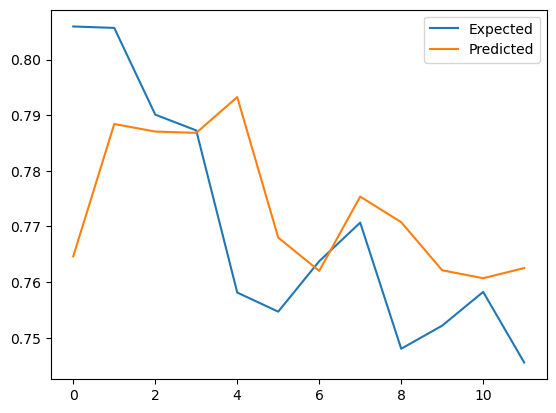

In [122]:
# writing a function to transform the time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
   n_vars = 1 if isinstance(data, list) else data.shape[1]
   df = DataFrame(data)
   cols = list()
   for i in range(n_in, 0, -1):
       cols.append(df.shift(i))
   for i in range(0, n_out):
       cols.append(df.shift(-i))
   agg = concat(cols, axis=1)
   if dropnan:
       agg.dropna(inplace=True)
   return agg.values

# This function will split a dataset into train/test sets
def train_test_split(data, n_test):
   return data[:-n_test, :], data[-n_test:, :]

# This function will fit a random forest model and make a one-step prediction
def random_forest_forecast(train, testX):
   train = np.array(train)
   trainX, trainy = train[:, :-1], train[:, -1]
   model = RandomForestRegressor(n_estimators=100)
   model.fit(trainX, trainy)
   yhat = model.predict([testX])
   return yhat[0]


# This funtion we will use for walk forward validation
def walk_forward_validation(data, n_test):
   predictions = list()
   train, test = train_test_split(data, n_test)
   history = [x for x in train]
   for i in range(len(test)):
       testX, testy = test[i, :-1], test[i, -1]
       yhat = random_forest_forecast(history, testX)
       predictions.append(yhat)
       history.append(test[i])
       print('>expected=%.4f, predicted=%.4f' % (testy, yhat))
   error = mean_absolute_error(test[:, -1], predictions)
   return error, test[:, -1], predictions

# Now, we will transform the time series data into supervised learning
values = features_array.reshape(-1, 1)
features_array = series_to_supervised(values, n_in=12)

# Let’s evaluate the model using walk-forward validation
mae, y, yhat = walk_forward_validation(features_array, 12)
print('MAE: %.3f' % mae)
print('RMSE: %.3f' % rmse)
# Finally visualize the expected vs predicted values
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()

# Perform a Random Forest Analysis

Run the Random Forest Model

In [123]:
# Split the features3 data into target and features
X = features3[['vehicle_count_automated_traffic_volume_counts','average_percipitation','avg_temp','vc_rating', 'ap_rating', 'at_rating','Year','Month','Is_quarter_start','Is_year_start','Elapsed']]
y = features3['wait_assessment']

In [124]:
# import the train_test_split function
from sklearn.model_selection import train_test_split

In [126]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the random forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the evaluation metrics
print(f"Mean Absolute Error: {mae:.3f}")
print(f"Root Mean Squared Error: {rmse:.3f}")


Mean Absolute Error: 0.014
Root Mean Squared Error: 0.017


c:\Users\Paul\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

In [ ]:
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [ ]:
# Get the feature importances
feature_importances = model.feature_importances_

# Assuming X_train is a DataFrame
feature_names = X_train.columns

# Get the unique feature names and their corresponding importances
unique_feature_names, unique_importances = [], []

for name in set(feature_names):
    indices = [i for i, x in enumerate(feature_names) if x == name]
    unique_feature_names.append(name)
    unique_importances.append(sum(feature_importances[indices]))

# Convert to NumPy arrays
unique_feature_names = np.array(unique_feature_names)
unique_importances = np.array(unique_importances)

# Get the top ten indices
top_ten_idx = np.argsort(unique_importances)[-10:]

# Create a bar plot of the top ten feature importances
plt.figure(figsize=(10, 8))
plt.title('Top 10 Feature Importances (Aggregated)')
plt.barh(range(len(top_ten_idx)), unique_importances[top_ten_idx], align='center')
plt.yticks(range(len(top_ten_idx)), unique_feature_names[top_ten_idx])
plt.xlabel('Relative Importance')
plt.show()

Scale the data

In [99]:
# Create a StandardScaler object
scaler = StandardScaler()

# Standardize the variables in the features2 dataframe
features3_scaled = scaler.fit_transform(features3)

In [100]:
# Create a new dataframe with the standardized variables
features3_standardized = pd.DataFrame(features3_scaled, columns = features3.columns)

# Print the first few rows of the standardized dataframe
print(features3_standardized.head())

   wait_assessment  vehicle_count_automated_traffic_volume_counts  \
0        -0.503568                                      -0.266022   
1        -2.897123                                      -0.577774   
2        -2.596466                                       0.665941   
3        -0.175238                                       0.780707   
4        -0.115008                                       1.440517   

   average_percipitation  avg_temp  vc_rating  ap_rating  at_rating      Year  \
0               0.420373 -1.736613  -0.535477   0.973417  -0.535477 -1.549193   
1              -0.947106 -2.125878  -0.535477  -0.572598  -0.535477 -1.549193   
2               0.146877 -1.204618   0.986405  -0.572598  -0.535477 -1.549193   
3              -0.947106 -0.153603   0.986405  -0.572598  -0.535477 -1.549193   
4              -1.083853  0.767656   2.508287  -0.572598  -0.535477 -1.549193   

      Month  Is_quarter_start  Is_year_start   Elapsed  
0 -1.593255          1.414214       3.316

In [ ]:
features3_standardized.describe(include="all")

Rerun the model

In [101]:
# Split the features3 data into target and features
X = features3_standardized[['vehicle_count_automated_traffic_volume_counts','average_percipitation','avg_temp','vc_rating', 'ap_rating', 'at_rating','Year','Month','Is_quarter_start','Is_year_start','Elapsed']]
y = features3_standardized['wait_assessment']

In [102]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the random forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the evaluation metrics
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

Mean Absolute Error: 0.56
Root Mean Squared Error: 0.70


c:\Users\Paul\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

In [ ]:
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [ ]:
# Get the feature importances
feature_importances = model.feature_importances_

# Assuming X_train is a DataFrame
feature_names = X_train.columns

# Get the unique feature names and their corresponding importances
unique_feature_names, unique_importances = [], []

for name in set(feature_names):
    indices = [i for i, x in enumerate(feature_names) if x == name]
    unique_feature_names.append(name)
    unique_importances.append(sum(feature_importances[indices]))

# Convert to NumPy arrays
unique_feature_names = np.array(unique_feature_names)
unique_importances = np.array(unique_importances)

# Get the top ten indices
top_ten_idx = np.argsort(unique_importances)[-10:]

# Create a bar plot of the top ten feature importances
plt.figure(figsize=(10, 8))
plt.title('Top 10 Feature Importances (Aggregated)')
plt.barh(range(len(top_ten_idx)), unique_importances[top_ten_idx], align='center')
plt.yticks(range(len(top_ten_idx)), unique_feature_names[top_ten_idx])
plt.xlabel('Relative Importance')
plt.show()

Perform Parameter Optimization

In [127]:
# Split the features3 data into target and features
X = features3_standardized[['vehicle_count_automated_traffic_volume_counts','average_percipitation','avg_temp','vc_rating', 'ap_rating', 'at_rating','Year','Month','Is_quarter_start','Is_year_start','Elapsed']]
y = features3_standardized['wait_assessment']

In [132]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [None,2, 5, 10],
    'min_samples_leaf': [None,1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

# Create the random forest model
model = RandomForestRegressor(random_state=42)

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the best hyperparameters and evaluation metrics
print("Best Hyperparameters:")
print(best_params)
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

Best Hyperparameters:
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Mean Absolute Error: 0.57
Root Mean Squared Error: 0.72


c:\Users\Paul\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
1665 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Paul\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Paul\anaconda3\lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Users\Paul\anaconda3\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Paul\anaconda3\lib\site-packages\

Rerun the model

In [105]:
# Split the features3 data into target and features
X = features3_standardized[['vehicle_count_automated_traffic_volume_counts','average_percipitation','avg_temp','vc_rating', 'ap_rating', 'at_rating','Year','Month','Is_quarter_start','Is_year_start','Elapsed']]
y = features3_standardized['wait_assessment']

In [106]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the random forest model with specified hyperparameters
model = RandomForestRegressor(
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=100,
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the evaluation metrics
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")


Mean Absolute Error: 0.57
Root Mean Squared Error: 0.72


c:\Users\Paul\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

In [ ]:
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [ ]:
# Get the feature importances
feature_importances = model.feature_importances_

# Assuming X_train is a DataFrame
feature_names = X_train.columns

# Get the unique feature names and their corresponding importances
unique_feature_names, unique_importances = [], []

for name in set(feature_names):
    indices = [i for i, x in enumerate(feature_names) if x == name]
    unique_feature_names.append(name)
    unique_importances.append(sum(feature_importances[indices]))

# Convert to NumPy arrays
unique_feature_names = np.array(unique_feature_names)
unique_importances = np.array(unique_importances)

# Get the top ten indices
top_ten_idx = np.argsort(unique_importances)[-10:]

# Create a bar plot of the top ten feature importances
plt.figure(figsize=(10, 8))
plt.title('Top 10 Feature Importances (Aggregated)')
plt.barh(range(len(top_ten_idx)), unique_importances[top_ten_idx], align='center')
plt.yticks(range(len(top_ten_idx)), unique_feature_names[top_ten_idx])
plt.xlabel('Relative Importance')
plt.show()

# Create a Hybrid Model using the Random Forest and Sarimax Models

Extract the Residuals and append to the data

In [ ]:
features3_standardized.describe(include="all")

In [109]:
residuals = results1.resid

In [ ]:
residuals.describe()

In [ ]:
# Plot the residuals
plt.figure(figsize=(15, 7))
plt.plot(residuals, color="blue")
plt.title("Residuals Plot")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Check the indices
print(residuals.index)
print(features3.index)

In [110]:
# Convert the index to a datetime index starting from 2015-01-01
features3.index = pd.date_range(start='2015-01-01', freq='M', periods=len(features3))

In [111]:
# Add residuals to the DataFrame
features3['sarimax_residuals'] = residuals

In [ ]:
features3.describe(include="all")

In [112]:
# Scale the numerical features in the features3 dataframe using StandardScaler
scaler = StandardScaler()

# Standardize the variables in the features2 dataframe
features3_scaled = scaler.fit_transform(features3)

In [113]:
# Create a new dataframe with the standardized variables
features3_standardized = pd.DataFrame(features3_scaled, columns = features3.columns)

# Print the first few rows of the standardized dataframe
print(features3_standardized.head())

   wait_assessment  vehicle_count_automated_traffic_volume_counts  \
0        -0.503568                                      -0.266022   
1        -2.897123                                      -0.577774   
2        -2.596466                                       0.665941   
3        -0.175238                                       0.780707   
4        -0.115008                                       1.440517   

   average_percipitation  avg_temp  vc_rating  ap_rating  at_rating      Year  \
0               0.420373 -1.736613  -0.535477   0.973417  -0.535477 -1.549193   
1              -0.947106 -2.125878  -0.535477  -0.572598  -0.535477 -1.549193   
2               0.146877 -1.204618   0.986405  -0.572598  -0.535477 -1.549193   
3              -0.947106 -0.153603   0.986405  -0.572598  -0.535477 -1.549193   
4              -1.083853  0.767656   2.508287  -0.572598  -0.535477 -1.549193   

      Month  Is_quarter_start  Is_year_start   Elapsed  sarimax_residuals  
0 -1.593255          1

In [114]:
# Convert the index to a datetime index starting from 2015-01-01
features3_standardized.describe(include="all")

,wait_assessment,vehicle_count_automated_traffic_volume_counts,average_percipitation,avg_temp,vc_rating,ap_rating,at_rating,Year,Month,Is_quarter_start,Is_year_start,Elapsed,sarimax_residuals
count,1.080000e+02,1.080000e+02,1.080000e+02,1.080000e+02,1.080000e+02,1.080000e+02,1.080000e+02,1.080000e+02,1.080000e+02,1.080000e+02,1.080000e+02,1.080000e+02,1.080000e+02
mean,-7.923703e-15,-1.089663e-16,-2.055969e-16,9.046262e-17,-4.934325e-17,-1.161622e-16,-7.401487e-17,-1.644775e-17,1.439178e-17,7.401487e-17,-1.027984e-18,2.672759e-17,-2.775558e-17
std,1.004662e+00,1.004662e+00,1.004662e+00,1.004662e+00,1.004662e+00,1.004662e+00,1.004662e+00,1.004662e+00,1.004662e+00,1.004662e+00,1.004662e+00,1.004662e+00,1.004662e+00
min,-2.897123e+00,-8.288539e-01,-1.494097e+00,-2.125878e+00,-5.354769e-01,-5.725983e-01,-5.354769e-01,-1.549193e+00,-1.593255e+00,-7.071068e-01,-3.015113e-01,-1.715497e+00,-2.883059e+00
25%,-4.830801e-01,-7.314700e-01,-6.736099e-01,-8.786088e-01,-5.354769e-01,-5.725983e-01,-5.354769e-01,-7.745967e-01,-7.966275e-01,-7.071068e-01,-3.015113e-01,-8.584315e-01,-5.586267e-01
50%,5.025821e-02,-2.750752e-01,-1.266184e-01,4.751672e-02,-5.354769e-01,-5.725983e-01,-5.354769e-01,0.000000e+00,0.000000e+00,-7.071068e-01,-3.015113e-01,-8.391982e-04,-7.718029e-02
75%,7.329667e-01,2.736806e-01,4.203731e-01,9.460693e-01,-1.550065e-01,9.734172e-01,-1.550065e-01,7.745967e-01,7.966275e-01,1.414214e+00,-3.015113e-01,8.585974e-01,5.289874e-01
max,2.256682e+00,3.904892e+00,4.659557e+00,1.513747e+00,2.508287e+00,2.519433e+00,2.508287e+00,1.549193e+00,1.593255e+00,1.414214e+00,3.316625e+00,1.715926e+00,3.722251e+00


Perform a Random Forest Analysis

In [136]:
# Split the features3 data into target and features
X = features3_standardized[['vehicle_count_automated_traffic_volume_counts','average_percipitation','avg_temp','vc_rating', 'ap_rating', 'at_rating','Year','Month','Is_quarter_start','Is_year_start','Elapsed', 'sarimax_residuals']]
y = features3_standardized['wait_assessment']

In [137]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the random forest model with specified hyperparameters
model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the evaluation metrics
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

Mean Absolute Error: 0.50
Root Mean Squared Error: 0.63


c:\Users\Paul\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# Plot the actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

In [ ]:
# Plot the residuals
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [ ]:
# Plot the feature importances
feature_importances = model.feature_importances_
feature_names = X_train.columns

# Get the top ten indices
top_ten_idx = np.argsort(feature_importances)[-10:]

# Create a bar plot of the top ten feature importances
plt.figure(figsize=(10, 8))
plt.title('Top 10 Feature Importances')
plt.barh(range(len(top_ten_idx)), feature_importances[top_ten_idx], align='center')
plt.yticks(range(len(top_ten_idx)), feature_names[top_ten_idx])
plt.xlabel('Relative Importance')
plt.show()


Perform Parameter Optimization

In [138]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [None, 2, 5, 10],
    'min_samples_leaf': [None, 1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

# Create the random forest model
model = RandomForestRegressor(random_state=42)

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the best hyperparameters and evaluation metrics
print("Best Hyperparameters:")
print(best_params)
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

Best Hyperparameters:
{'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Mean Absolute Error: 0.49
Root Mean Squared Error: 0.62


c:\Users\Paul\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
1665 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Paul\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Paul\anaconda3\lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Users\Paul\anaconda3\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Paul\anaconda3\lib\site-packages\

Rerun the model

In [139]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the random forest model with specified hyperparameters
model = RandomForestRegressor(
    max_depth= None,
    max_features= None,
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the evaluation metrics
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

Mean Absolute Error: 0.49
Root Mean Squared Error: 0.62


c:\Users\Paul\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# Plot the actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

In [ ]:
# Plot the residuals
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [ ]:
# Plot the feature importances
feature_importances = model.feature_importances_
feature_names = X_train.columns

# Get the top ten indices
top_ten_idx = np.argsort(feature_importances)[-10:]

# Create a bar plot of the top ten feature importances
plt.figure(figsize=(10, 8))
plt.title('Top 10 Feature Importances')
plt.barh(range(len(top_ten_idx)), feature_importances[top_ten_idx], align='center')
plt.yticks(range(len(top_ten_idx)), feature_names[top_ten_idx])
plt.xlabel('Relative Importance')
plt.show()

# Create Multiple Route Models and Visualize

Take the Delay Data needed for the model

In [ ]:
# Describe the delays dataframe
delays.describe(include="all")

In [56]:
# Join the weather_features and traffic_features dataframes together
weather_traffic_features = pd.merge(weather_features, traffic_features, on="date", how="left")

In [57]:
# Convert the date column to a datetime data type
delays['date'] = pd.to_datetime(delays['date'])

In [58]:
# Convert the date column to a datetime format
weather_traffic_features['date'] = pd.to_datetime(weather_traffic_features['date'])

In [59]:
# Join the delays and weather_traffic_features dataframes together
delays_features = pd.merge(delays, weather_traffic_features, on="date", how="left")

In [ ]:
# Print the shape of the weather_traffic_features dataframe
print(delays_features.shape)

# Describe the weather_traffic_features dataframe
delays_features.describe(include="all")

In [60]:
# Print a value count of the route_id column
delays_features["route_id"].value_counts()

# List the route_id values that have 432 rows
delays_features["route_id"].value_counts().index[delays_features["route_id"].value_counts() == 432]

Index(['BX1', 'Q104', 'M8', 'M9', 'M96', 'SBS15', 'SBS60', 'Q1', 'Q10', 'Q100',
       ...
       'B49', 'BX24', 'BX26', 'B52', 'B54', 'B57', 'B6', 'B60', 'B61', 'BX23'],
      dtype='object', length=201)

In [ ]:
# Create a route specific dataframe for the BX26 route
delays_bx26 = delays_features[delays_features["route_id"] == "BX26"]

delays_bx26.describe(include="all")

In [61]:
# Create a list of the route_id values that have 432 rows
route_ids = delays_features["route_id"].value_counts().index[delays_features["route_id"].value_counts() == 432].tolist()

Find Valid Combinations of Routes

In [62]:
# Create a dataframe with only the route_id values that have 432 rows based on the route_ids list
delays_features_432 = delays_features[delays_features["route_id"].isin(route_ids)]

In [63]:
# Convert the date column to a datetime data type
delays_features_432["date"] = pd.to_datetime(delays_features_432["date"])

C:\Users\Paul\AppData\Local\Temp\ipykernel_10744\1018092786.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delays_features_432["date"] = pd.to_datetime(delays_features_432["date"])


In [64]:
# Group the data by the route_id and date columns and take the mean of the wait_assessment column
delays_features_432 = delays_features_432.groupby(["route_id", "date"]).agg({"wait_assessment": "mean", "average_percipitation": "mean", "avg_temp": "mean","vehicle_count_automated_traffic_volume_counts": "mean"}).reset_index()

In [65]:
# Create a list of the route_id values that don't have 108 rows
route_ids2 = delays_features_432["route_id"].value_counts().index[delays_features_432["route_id"].value_counts() != 108].tolist()

In [66]:
route_ids2

['X27']

In [67]:
# Remove the route_id values that don't have 108 rows
delays_features_432 = delays_features_432[~delays_features_432["route_id"].isin(route_ids2)]

In [ ]:
# Convert the date column to a datetime data type
delays_features_432["date"] = pd.to_datetime(delays_features_432["date"])

# Set the date column as the index
delays_features_432 = delays_features_432.set_index("date")

In [68]:
filtered_df = delays_features_432

In [69]:
# Calculate the size of each group
group_sizes = filtered_df.groupby(['route_id']).size().reset_index(name='group_size')

# Filter groupings with 108 rows
valid_groups = group_sizes[group_sizes['group_size'] == 108]

In [70]:
# Merge with the original DataFrame to get the rows from valid groups
filtered_df = pd.merge(filtered_df, valid_groups[['route_id']], on=['route_id'])

In [71]:
# Get a list of every route id
route_ids = filtered_df['route_id'].unique()

# Create a rolling mean diff column for each route id to ensure the time series is stationary
for route_id in route_ids:
    data = filtered_df[filtered_df['route_id'] == route_id].copy()  # Make a copy to avoid modifying the original DataFrame
    rolling_mean = data['wait_assessment'].rolling(window=12, min_periods=1).mean()  # Calculate rolling mean with min_periods=1 to handle NaNs
    data['rolling_mean_diff'] = rolling_mean.diff()  # Calculate the difference between consecutive rolling mean values
    data['rolling_mean_diff'] = data['rolling_mean_diff'].fillna(data['rolling_mean_diff'].mean())
    filtered_df.loc[filtered_df['route_id'] == route_id, 'rolling_mean_diff'] = data['rolling_mean_diff']  # Assign the result back to the original DataFrame


In [ ]:
filtered_df.describe(include="all")

In [72]:
# Scale the numerical columns in the filtered_df dataframe
scaler = StandardScaler()
filtered_df[['wait_assessment', 'average_percipitation', 'avg_temp', 'vehicle_count_automated_traffic_volume_counts', 'rolling_mean_diff']] = scaler.fit_transform(filtered_df[['wait_assessment', 'average_percipitation', 'avg_temp', 'vehicle_count_automated_traffic_volume_counts', 'rolling_mean_diff']])
filtered_df.describe(include="all")

C:\Users\Paul\AppData\Local\Temp\ipykernel_10744\97953279.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  filtered_df.describe(include="all")


,route_id,date,wait_assessment,average_percipitation,avg_temp,vehicle_count_automated_traffic_volume_counts,rolling_mean_diff
count,21600,21600,2.160000e+04,2.160000e+04,2.160000e+04,2.160000e+04,2.160000e+04
unique,200,108,NaN,NaN,NaN,NaN,NaN
top,B1,2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
freq,108,200,NaN,NaN,NaN,NaN,NaN
first,NaN,2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,2023-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,-1.631617e-16,1.553490e-16,1.049366e-16,1.672736e-16,2.631640e-18
std,NaN,NaN,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00
min,NaN,NaN,-5.898618e+00,-1.494097e+00,-2.125878e+00,-8.288539e-01,-1.366984e+01
25%,NaN,NaN,-6.662382e-01,-6.736099e-01,-8.786088e-01,-7.314700e-01,-3.924767e-01


In [ ]:
# Convert the date column to a datetime data type
filtered_df["date"] = pd.to_datetime(filtered_df["date"])

# Set the date column as the index
filtered_df = filtered_df.set_index("date")

Run the Model Looping through the Valid Combinations

In [73]:
# Create a dictionary to store the models, predictions, and route_ids
sarimax_results = {}

# Iterate over the unique route_ids
for route_id in filtered_df['route_id'].unique():
    # Filter the data for the current route_id
    route_data = filtered_df[filtered_df['route_id'] == route_id]
    
    # Set the frequency of the index to monthly
    route_data.index = pd.date_range(start='2015-01-01', periods=len(route_data), freq='M')
    
    # Define the endogenous variable (target)
    endog = route_data['rolling_mean_diff']

    # Define the exogenous variables
    exog = route_data[['average_percipitation', 'avg_temp', 'vehicle_count_automated_traffic_volume_counts']]
    
    # Add a constant to the exogenous variables
    exog = sm.add_constant(exog)
    
    # Perform test/train split
    train_size = 0.8  # You can adjust this ratio as needed
    endog_train, endog_test, exog_train, exog_test = train_test_split(
    endog, exog, train_size=train_size, shuffle=False
    )

    # Set the frequency of the time series to monthly
    freq = 'M'
    
    # Create the SARIMAX model
    model = sm.tsa.SARIMAX(endog_train, exog = exog_train, order=(0, 1, 0), seasonal_order=(0, 1, 1, 12), freq = freq)
    
    # Fit the model
    model_fit = model.fit()
    
    # Make predictions on the test set
    forecast = model_fit.get_forecast(steps=len(endog_test), exog=exog_test)
    
    # Save the model, predictions, and route_id to the dictionary
    sarimax_results[route_id] = {'model': model_fit, 'predictions': forecast, 'route_id': route_id}

# Print the dictionary of models, predictions, and route_ids
print(sarimax_results)

c:\Users\Paul\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\Paul\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\Paul\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\Paul\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\Paul\anaconda3\lib\site-package

{'B1': {'model': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000268CC915660>, 'predictions': <statsmodels.tsa.statespace.mlemodel.PredictionResultsWrapper object at 0x00000268CC9156F0>, 'route_id': 'B1'}, 'B100': {'model': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000268CC9143D0>, 'predictions': <statsmodels.tsa.statespace.mlemodel.PredictionResultsWrapper object at 0x00000268CC7B0190>, 'route_id': 'B100'}, 'B103': {'model': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000268CC915150>, 'predictions': <statsmodels.tsa.statespace.mlemodel.PredictionResultsWrapper object at 0x00000268CC7B0A00>, 'route_id': 'B103'}, 'B11': {'model': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000268CC7B0910>, 'predictions': <statsmodels.tsa.statespace.mlemodel.PredictionResultsWrapper object at 0x00000268CC7B18A0>, 'route_id': 'B11'}, 'B12': {'model': <statsmodels.tsa.statespace.sarimax.SARIMAXR

In [ ]:
route_data.describe(include="all")

Create dashboard to visualize the results

In [ ]:
# Create a dropdown with unique route_ids
route_id_options = [{'label': str(route_id), 'value': route_id} for route_id in sarimax_results.keys()]

In [ ]:
# Create a Dash app
app = dash.Dash(__name__)

In [ ]:
# Layout of the app
app.layout = html.Div([
    html.Label('Select Route Id:', style={'font-weight': 'bold', 'margin-bottom': '10px'}),
    dcc.Dropdown(
        id='route-id-dropdown',
        options=route_id_options,
        value=route_id_options[0]['value'],
        style={'width': '50%', 'margin-bottom': '20px'}
    ),
    dcc.Graph(id='time-series-plot',
        config={'displayModeBar': False})
])

In [ ]:
# Callback to update the plot based on the selected Route Id
@app.callback(
    dash.dependencies.Output('time-series-plot', 'figure'),
    [dash.dependencies.Input('route-id-dropdown', 'value')]
)
def update_plot(selected_route_id):
    # Retrieve model and predictions for the selected Route Id
    model_fit = sarimax_results[selected_route_id]['model']
    predictions = sarimax_results[selected_route_id]['predictions']
    route_data = filtered_df[filtered_df['route_id'] == selected_route_id]
    endog_train = route_data['rolling_mean_diff'][:int(len(route_data) * 0.8)]
    endog_test = route_data['rolling_mean_diff'][int(len(route_data) * 0.8):]

    # Plot actual values from the training set
    trace1 = go.Scatter(x=endog_train.index, y=endog_train, mode='lines', name='Actual (Training Set)', line=dict(color='blue'))

    # Plot actual values from the test set
    trace2 = go.Scatter(x=endog_test.index, y=endog_test, mode='lines', name='Actual (Test Set)', line=dict(color='blue', dash='dash'))

    # Plot predicted values from the test set
    trace3 = go.Scatter(x=endog_test.index, y=predictions.predicted_mean.to_numpy(), mode='lines', name='Predicted (Test Set)', line=dict(color='orange'))

    # Set layout options
    layout = dict(
        title='Actual vs Predicted Values',
        xaxis=dict(title='Date'),
        yaxis=dict(title='Wait Assessment'),
        legend=dict(x=0, y=1, traceorder='normal')
    )

    # Create the figure
    figure = dict(data=[trace1, trace2, trace3], layout=layout)

    return figure


In [ ]:
# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, use_reloader=False)
